<a href="https://colab.research.google.com/github/DostdarDost/Linear-Algrbra-for-Machine-Learning/blob/main/Machine_Learning_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#⇔ ⇔ ⇔ Machine Learning ⇔ ⇔ ⇔


> In this short course we are gona throught machine learning and it types and its algroithms Thoery as well as Coding Explore.

# Types of Machine Learning
>$→$ 1. Supervied Machine Learning.

>$→$ 2. Unsupervied Machine Learning.

>$→$ 3. Reinforment Machine Learning.

# Algorithms of Superviose Machine learning
There are two mainly use basic algorthims of supervied machine learning.
> $→$ Classification algorithms

> $→$ Regression algorithms

# Classifiers (classification algorithms)

> $→$ Decision Tree

> $→$ Random Forest

> $→$ Support vector Machine

**Algorithm: Train Tree**

Input: $D$, a dataset of training records of the form $(X, Y)$.
Output: Root node $R$ of a trained decision tree
>1 Create a root node $R$

>2 If a stopping criterion has been reached then label $R$ with the most common value of $𝑌$ in $𝐷$ and output $R$

>3 For each input variable $𝑋_𝑖$ in $X$

>a.    Find the test $𝑇$𝑖 whose partition $𝐷_1$, $𝐷_2$…$𝐷_𝑛$ performs best according to the chosen splitting metric.

> b.    Record this test and the value of the splitting metric

>4 Let $𝑇_𝑖$ be the best test according to the splitting metric, let $𝑉$ be the value of the splitting metric, and let $𝐷_1$, $𝐷_2$… $𝐷_𝑛$ be the partition.

>5 If $𝑉<𝑡ℎ𝑟𝑒𝑠ℎ𝑜𝑙𝑑$

>a.    Label R with the most common value of $𝑌$ in $𝐷$ and output $R$
>6 Label R with $𝑇_𝑖$ and make a child node $𝐶_𝑖$ of $R$ for each outcome $𝑂_𝑖$ of $𝑇_𝑖$.

>7 For each outcome Oi of $𝑇_𝑖$

>>a.    Create a new child node $𝐶_𝑖$ of $R$, and label the edge $𝑂_𝑖$

>>b.    Set $С_𝑖$ = Train Tree$(𝐷_𝑖)$

>8 Output R

 This posud code <http://fiascodata.blogspot.com/2018/08/decision-tree-mathematical-formulation.html>




# Decision Tree
>> Scratch

In [2]:
from collections import Counter

import numpy as np


def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])


class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (
            depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_entropy = entropy(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # information gain is difference in loss before vs. after split
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common


if __name__ == "__main__":
    # Imports
    from sklearn import datasets
    from sklearn.model_selection import train_test_split

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    data = datasets.load_breast_cancer()
    X, y = data.data, data.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    clf = DecisionTree(max_depth=10)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc = accuracy(y_test, y_pred)

    print("Accuracy:", acc)

Accuracy: 0.9210526315789473


# Random Forest
>> Scratch

In [5]:
from collections import Counter

import numpy as np




def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]


def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common


class RandomForest:
    def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(
                min_samples_split=self.min_samples_split,
                max_depth=self.max_depth,
                n_feats=self.n_feats,
            )
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)


# Testing
if __name__ == "__main__":
    # Imports
    from sklearn import datasets
    from sklearn.model_selection import train_test_split

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    data = datasets.load_breast_cancer()
    X = data.data
    y = data.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    clf = RandomForest(n_trees=3, max_depth=10)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy(y_test, y_pred)

    print("Accuracy:", acc)

Accuracy: 0.9473684210526315


#Support Vector Machine (SVM)
>> Scratched


[0.50477434 0.20201536] -0.3710000000000003


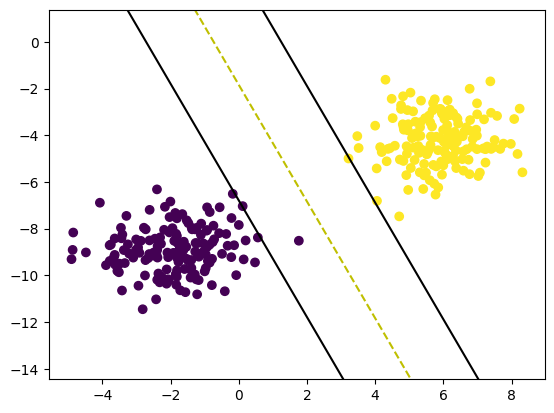

In [1]:
import numpy as np


class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


# Testing
if __name__ == "__main__":
    # Imports
    from sklearn import datasets
    import matplotlib.pyplot as plt

    X, y = datasets.make_blobs(
        n_samples=313, n_features=2, centers=2, cluster_std=1.05, random_state=40
    )
    y = np.where(y == 0, -1, 1)

    clf = SVM()
    clf.fit(X, y)
    # predictions = clf.predict(X)

    print(clf.w, clf.b)

    def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

    visualize_svm()

# Predictions (Regression algorithms)
> $→$ Linear Regression

> $→$ Logistic Regression.

> $→$ Polynominal Regression. 

# Linear Regression
>> Scratch

MSE: 305.7719958301902
Accuracy: 0.9253717934621964


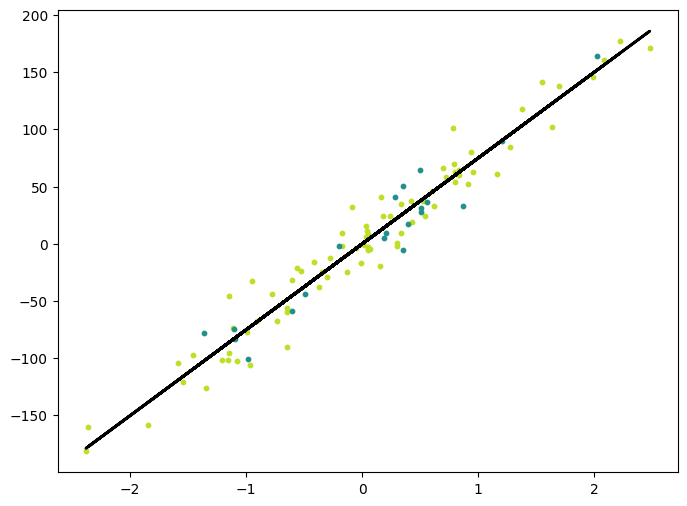

In [6]:
import numpy as np


def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2


class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated


# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    X, y = datasets.make_regression(
        n_samples=100, n_features=1, noise=20, random_state=4
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    print("MSE:", mse)

    accu = r2_score(y_test, predictions)
    print("Accuracy:", accu)

    y_pred_line = regressor.predict(X)
    cmap = plt.get_cmap("viridis")
    fig = plt.figure(figsize=(8, 6))
    m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
    m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
    plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
    plt.show()

# Logistic Regression
>> Scratch

In [7]:
import numpy as np


class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


# Testing
if __name__ == "__main__":
    # Imports
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    bc = datasets.load_breast_cancer()
    X, y = bc.data, bc.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)

    print("LR classification accuracy:", accuracy(y_test, predictions))

LR classification accuracy: 0.9298245614035088


# Library Packages

> $→$ Numpy.

> $→$ Pandas.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# load data set
df =pd.read_csv("/content/ZFA.csv")

In [ ]:
df=pd.DataFrame(df)



In [ ]:
df

,image index,Type,mean,std,25%,50%,75%,min,max,homogeneity,energy,contrast,correlation,entropy
0,411,Tumor,1131.95420,383.40416,1014,1047,1073,0,4071,9.8248,0.986770,0.862900,0.961230,0.378630
1,412,Tumor,1129.09700,392.25126,1008,1045,1076,0,4071,10.7414,0.985861,0.859597,0.960276,0.382695
2,413,Tumor,1149.41410,429.69423,1007,1050,1086,0,4071,12.6783,0.984448,0.857034,0.957805,0.403957
3,414,Tumor,1170.91730,479.39970,1004,1047,1098,0,4071,14.8290,0.983279,0.854010,0.956925,0.421981
4,415,Tumor,1169.18230,487.95165,1001,1045,1105,0,4071,15.6743,0.982747,0.850520,0.954881,0.430213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,461,Healthy,823.16865,585.10568,33,1021,1053,0,2429,15.3111,0.992549,0.841616,0.945740,0.583037
72,462,Healthy,801.37263,605.14647,19,1023,1058,0,2359,13.9397,0.993497,0.844160,0.945608,0.586351
73,463,Healthy,770.52496,627.03782,12,1019,1057,0,2378,14.5382,0.992934,0.849438,0.948184,0.580308
74,464,Healthy,746.26954,645.14935,7,1014,1059,0,2432,11.8827,0.993836,0.856866,0.950124,0.566504


import altair as alt
from google.colab import autoviz
df_8198600051166216540 = autoviz.get_registered_df('df_8198600051166216540')

def histogram(df, colname, maxbins=20, width=100, height=50):
  return (alt.Chart(df).mark_bar()
          .encode(
              x=alt.X(colname, bin=alt.Bin(maxbins=maxbins)),
              y=alt.Y('count()', axis=alt.Axis(title='count')),
          )
          .properties(width=width, height=height))  #  Pixels.

chart = histogram(df_8198600051166216540, *['index'], **{})
chart

import altair as alt
from google.colab import autoviz
df_2881866583412892511 = autoviz.get_registered_df('df_2881866583412892511')

def histogram(df, colname, maxbins=20, width=100, height=50):
  return (alt.Chart(df).mark_bar()
          .encode(
              x=alt.X(colname, bin=alt.Bin(maxbins=maxbins)),
              y=alt.Y('count()', axis=alt.Axis(title='count')),
          )
          .properties(width=width, height=height))  #  Pixels.

chart = histogram(df_2881866583412892511, *['image index'], **{})
chart

import altair as alt
from google.colab import autoviz
df_6488748601422259818 = autoviz.get_registered_df('df_6488748601422259818')

def histogram(df, colname, maxbins=20, width=100, height=50):
  return (alt.Chart(df).mark_bar()
          .encode(
              x=alt.X(colname, bin=alt.Bin(maxbins=maxbins)),
              y=alt.Y('count()', axis=alt.Axis(title='count')),
          )
          .properties(width=width, height=height))  #  Pixels.

chart = histogram(df_6488748601422259818, *['mean'], **{})
chart

import altair as alt
from google.colab import autoviz
df_4903135991482817233 = autoviz.get_registered_df('df_4903135991482817233')

def histogram(df, colname, maxbins=20, width=100, height=50):
  return (alt.Chart(df).mark_bar()
          .encode(
              x=alt.X(colname, bin=alt.Bin(maxbins=maxbins)),
              y=alt.Y('count()', axis=alt.Axis(title='count')),
          )
          .properties(width=width, height=height))  #  Pixels.

chart = histogram(df_4903135991482817233, *['std'], **{})
chart

import altair as alt
from google.colab import autoviz
df_190716902509255600 = autoviz.get_registered_df('df_190716902509255600')

def value_plot(df, y, sort_ascending=False, width=100, height=50):
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  return (alt.Chart(df.reset_index()).mark_line()
          .encode(x=alt.X('index', title=''), y=alt.X(y, title='value'))
          .properties(width=width, height=height, title=y))

chart = value_plot(df_190716902509255600, *['index'], **{})
chart

import altair as alt
from google.colab import autoviz
df_6866037883961641766 = autoviz.get_registered_df('df_6866037883961641766')

def value_plot(df, y, sort_ascending=False, width=100, height=50):
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  return (alt.Chart(df.reset_index()).mark_line()
          .encode(x=alt.X('index', title=''), y=alt.X(y, title='value'))
          .properties(width=width, height=height, title=y))

chart = value_plot(df_6866037883961641766, *['image index'], **{})
chart

import altair as alt
from google.colab import autoviz
df_1755134959084916586 = autoviz.get_registered_df('df_1755134959084916586')

def value_plot(df, y, sort_ascending=False, width=100, height=50):
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  return (alt.Chart(df.reset_index()).mark_line()
          .encode(x=alt.X('index', title=''), y=alt.X(y, title='value'))
          .properties(width=width, height=height, title=y))

chart = value_plot(df_1755134959084916586, *['mean'], **{})
chart

import altair as alt
from google.colab import autoviz
df_6535942427632718304 = autoviz.get_registered_df('df_6535942427632718304')

def value_plot(df, y, sort_ascending=False, width=100, height=50):
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  return (alt.Chart(df.reset_index()).mark_line()
          .encode(x=alt.X('index', title=''), y=alt.X(y, title='value'))
          .properties(width=width, height=height, title=y))

chart = value_plot(df_6535942427632718304, *['std'], **{})
chart

import altair as alt
from google.colab import autoviz
df_1960052425765494445 = autoviz.get_registered_df('df_1960052425765494445')

def categorical_histogram(df, colname, width=100, height=50, colormap='dark2'):
  chart_data = df[colname].value_counts().reset_index(name='count')
  return (alt.Chart(chart_data).mark_bar()
          .encode(
              x='count', y=alt.Y('index', title=''),
              color=alt.Color(
                  'index', scale=alt.Scale(scheme=colormap), legend=None))
          .properties(width=width, height=height, title=colname))  # Pixels.

chart = categorical_histogram(df_1960052425765494445, *['Type'], **{})
chart

import altair as alt
from google.colab import autoviz
df_7482923541191150728 = autoviz.get_registered_df('df_7482923541191150728')

def linked_scatter_plots(
    df, colname_pairs, color='steelblue', deselected_color='lightgray',
    opacity=0.8, deselected_opacity=0.4, width=150, height=150):
  interval = alt.selection_interval()
  scatter = (alt.Chart(df).mark_circle()
             .encode(
                 color=alt.condition(
                     interval, alt.value(color), alt.value(deselected_color)),
                 opacity=alt.condition(
                     interval, alt.value(opacity),
                     alt.value(deselected_opacity)))
             .properties(
                 selection=interval, width=width, height=height))
  return alt.hconcat(*[scatter.encode(x=x, y=y) for x, y in colname_pairs])

chart = linked_scatter_plots(df_7482923541191150728, *[[['index', 'image index'], ['image index', 'mean'], ['mean', 'std'], ['std', '25%']]], **{})
chart

import altair as alt
from google.colab import autoviz
df_6449946498206971354 = autoviz.get_registered_df('df_6449946498206971354')

def swarm_plot(df, value_colname, facet_colname, height=150, width=150):
  value_min, value_max = df[value_colname].min(), df[value_colname].max()
  num_facets = len(df[facet_colname].unique())
  value_colname += ':Q'
  facet_colname += ':N'
  return (alt.Chart(df).mark_circle(size=8)
          .encode(
              x=alt.X('jitter:Q', title=None,
                      axis=alt.Axis(
                          values=[0], ticks=True, grid=False, labels=False)),
              y=alt.Y(value_colname,
                      scale=alt.Scale(domain=[value_min, value_max])),
              color=alt.Color(facet_colname, legend=None),
              column=alt.Column(
                  facet_colname,
                  header=alt.Header(
                      labelAngle=-90, titleOrient='top', labelOrient='bottom',
                      labelAlign='right', labelPadding=3)))
          .properties(height=height, width=width / num_facets)
          .transform_calculate(
              jitter='sqrt(-2*log(random()))*cos(2*PI*random())')  # Box-Muller.
          .configure_facet(spacing=0)
          .configure_view(stroke=None))

chart = swarm_plot(df_6449946498206971354, *['index', 'Type'], **{})
chart

import altair as alt
from google.colab import autoviz
df_3468847358816769893 = autoviz.get_registered_df('df_3468847358816769893')

def swarm_plot(df, value_colname, facet_colname, height=150, width=150):
  value_min, value_max = df[value_colname].min(), df[value_colname].max()
  num_facets = len(df[facet_colname].unique())
  value_colname += ':Q'
  facet_colname += ':N'
  return (alt.Chart(df).mark_circle(size=8)
          .encode(
              x=alt.X('jitter:Q', title=None,
                      axis=alt.Axis(
                          values=[0], ticks=True, grid=False, labels=False)),
              y=alt.Y(value_colname,
                      scale=alt.Scale(domain=[value_min, value_max])),
              color=alt.Color(facet_colname, legend=None),
              column=alt.Column(
                  facet_colname,
                  header=alt.Header(
                      labelAngle=-90, titleOrient='top', labelOrient='bottom',
                      labelAlign='right', labelPadding=3)))
          .properties(height=height, width=width / num_facets)
          .transform_calculate(
              jitter='sqrt(-2*log(random()))*cos(2*PI*random())')  # Box-Muller.
          .configure_facet(spacing=0)
          .configure_view(stroke=None))

chart = swarm_plot(df_3468847358816769893, *['image index', 'Type'], **{})
chart

import altair as alt
from google.colab import autoviz
df_2429985514631547177 = autoviz.get_registered_df('df_2429985514631547177')

def swarm_plot(df, value_colname, facet_colname, height=150, width=150):
  value_min, value_max = df[value_colname].min(), df[value_colname].max()
  num_facets = len(df[facet_colname].unique())
  value_colname += ':Q'
  facet_colname += ':N'
  return (alt.Chart(df).mark_circle(size=8)
          .encode(
              x=alt.X('jitter:Q', title=None,
                      axis=alt.Axis(
                          values=[0], ticks=True, grid=False, labels=False)),
              y=alt.Y(value_colname,
                      scale=alt.Scale(domain=[value_min, value_max])),
              color=alt.Color(facet_colname, legend=None),
              column=alt.Column(
                  facet_colname,
                  header=alt.Header(
                      labelAngle=-90, titleOrient='top', labelOrient='bottom',
                      labelAlign='right', labelPadding=3)))
          .properties(height=height, width=width / num_facets)
          .transform_calculate(
              jitter='sqrt(-2*log(random()))*cos(2*PI*random())')  # Box-Muller.
          .configure_facet(spacing=0)
          .configure_view(stroke=None))

chart = swarm_plot(df_2429985514631547177, *['mean', 'Type'], **{})
chart

import altair as alt
from google.colab import autoviz
df_2859149918511510053 = autoviz.get_registered_df('df_2859149918511510053')

def swarm_plot(df, value_colname, facet_colname, height=150, width=150):
  value_min, value_max = df[value_colname].min(), df[value_colname].max()
  num_facets = len(df[facet_colname].unique())
  value_colname += ':Q'
  facet_colname += ':N'
  return (alt.Chart(df).mark_circle(size=8)
          .encode(
              x=alt.X('jitter:Q', title=None,
                      axis=alt.Axis(
                          values=[0], ticks=True, grid=False, labels=False)),
              y=alt.Y(value_colname,
                      scale=alt.Scale(domain=[value_min, value_max])),
              color=alt.Color(facet_colname, legend=None),
              column=alt.Column(
                  facet_colname,
                  header=alt.Header(
                      labelAngle=-90, titleOrient='top', labelOrient='bottom',
                      labelAlign='right', labelPadding=3)))
          .properties(height=height, width=width / num_facets)
          .transform_calculate(
              jitter='sqrt(-2*log(random()))*cos(2*PI*random())')  # Box-Muller.
          .configure_facet(spacing=0)
          .configure_view(stroke=None))

chart = swarm_plot(df_2859149918511510053, *['std', 'Type'], **{})
chart

In [ ]:
df =pdread_csv("/content/titanic_data.csv")